## 필요한 패키지 설치 및 혹시나 쓸 셀레늄

In [144]:
%pip install selenium

import requests
from bs4 import BeautifulSoup

227702.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## 1. 따릉이 홈페이지 - 비동기 방식 데이터 크롤링 - 지역구별 따릉이 정류장의 개수

In [145]:
URL = 'https://www.bikeseoul.com/app/station/getStationRealtimeStatus.do'

response = requests.post(URL, 
                         data = {
                             "stationGrpSeq": "ALL",
                             "tabId": ""
                             }
                         )
soup = BeautifulSoup(response.text, "html.parser")

import json
data = json.loads(response.text)['realtimeList']

new_data = []

for info in data:
    new_info = []
    new_info = [info['stationName'], info['stationLongitude'], info['stationLatitude']]
    new_data.append(new_info)


new_data

#데이터가 너무 길면 전체 결과 출력 창에서도 짤릴 수 있음



[['102. 망원역 1번출구 앞', '126.91062927', '37.55564880'],
 ['103. 망원역 2번출구 앞', '126.91083527', '37.55495071'],
 ['104. 합정역 1번출구 앞', '126.91498566', '37.55062866'],
 ['105. 합정역 5번출구 앞', '126.91482544', '37.55000687'],
 ['106. 합정역 7번출구 앞', '126.91282654', '37.54864502'],
 ['107. 신한은행 서교동지점', '126.91850281', '37.55751038'],
 ['108. 서교동 사거리', '126.91861725', '37.55274582'],
 ['109. 제일빌딩 앞', '126.91998291', '37.54769135'],
 ['111. 상수역 2번출구 앞', '126.92353058', '37.54787064'],
 ['112. 극동방송국 앞', '126.92320251', '37.54920197'],
 ['113. 홍대입구역 2번출구 앞', '126.92382050', '37.55743790'],
 ['114. 홍대입구역 8번출구 앞', '126.92442322', '37.55706024'],
 ['115. 마스타 빌딩 앞', '126.92711639', '37.55893326'],
 ['117. 홍은사거리', '126.94132996', '37.59115982'],
 ['118. 광흥창역 2번출구 앞', '126.93176270', '37.54773331'],
 ['119. 서강나루 공원', '126.93105316', '37.54528427'],
 ['120. 신수동 사거리', '126.93411255', '37.54524231'],
 ['121. 마포소방서 앞', '126.93317413', '37.54976654'],
 ['122. 신성기사식당 앞', '126.93837738', '37.54745865'],
 ['123. 문화촌 공원',

## 1-1 Reverse Geocoding

In [146]:
%pip install PyNaver --upgrade

from PyNaver import NaverCloudPlatform
client_id = "liwz6ln7g8"
client_secret = "*apikey*"
api = NaverCloudPlatform(client_id, client_secret)


227716.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [147]:
#api 정상적으로 동작하나?

coords = "127.09294891,37.59909821"

# 실행
res = api.reverse_geocoding(coords)


res['results'][0]['region']['area2']['name']

from time import sleep
#동작한다!

In [148]:
#new_data의 coords 대입, 지역구별로 수량 체크
loc_dict = {}

for i in new_data:
    coords = (i[1]+','+i[2])
    res = api.reverse_geocoding(coords)
    try:
        loc = res['results'][0]['region']['area2']['name']
        
        if loc not in loc_dict.keys():
            loc_dict[loc] = 1 
        else:
            loc_dict[loc] += 1
    except:
        print(new_data.index(i), "에서 발생한 ERROR!")

loc_dict

660 에서 발생한 ERROR!
661 에서 발생한 ERROR!
952 에서 발생한 ERROR!
1524 에서 발생한 ERROR!
1604 에서 발생한 ERROR!
2076 에서 발생한 ERROR!
2209 에서 발생한 ERROR!
2641 에서 발생한 ERROR!
2701 에서 발생한 ERROR!


{'마포구': 121,
 '서대문구': 82,
 '영등포구': 148,
 '동작구': 72,
 '구로구': 111,
 '중구': 88,
 '종로구': 104,
 '광진구': 87,
 '성동구': 91,
 '동대문구': 82,
 '성북구': 82,
 '양천구': 109,
 '용산구': 91,
 '은평구': 96,
 '강동구': 121,
 '강서구': 181,
 '송파구': 212,
 '중랑구': 93,
 '강북구': 60,
 '노원구': 135,
 '의정부시': 1,
 '도봉구': 76,
 '금천구': 74,
 '관악구': 75,
 '서초구': 142,
 '강남구': 164,
 '하남시': 2}

## 2. 서울특별시 자전거도로 현황 - 비동기 크롤링

In [72]:
URL = 'https://stat.eseoul.go.kr/statHtml/html.do'

#비동기 크롤링
payload = """orgId: 201
tblId: DT_201004_O100005_02
language: ko
file: 
analText: 
scrId: 
fieldList: [{"targetId":"PRD","targetValue":"","prdValue":"Y,2021,@"},{"targetId":"ITM_ID","targetValue":"T001","prdValue":""},{"targetId":"ITM_ID","targetValue":"T002","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001002","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001002","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001003","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001004","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001005","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001006","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001007","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001008","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001009","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001010","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001011","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001012","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001013","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001014","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001015","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001016","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001017","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001018","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001019","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001020","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001021","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001022","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001023","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001024","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001025","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001002001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001002002","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001002003","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001001","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001002","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001003","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001004","prdValue":""}]
colAxis: TIME,B,ITEM
rowAxis: A
isFirst: N
contextPath: /statHtml
ordColIdx: 
ordType: 
logSeq: 
vwCd: 
listId: 
connPath: I2
statId: 1993015
pub: 
pubLog: 0
viewKind: 1
viewSubKind: 
doAnal: N
analType: 
analCmpr: 
analTime: 
analCombo: 
originData: 
analClass: 
analItem: 
obj_var_id: 
itm_id: 
mode: tab
dataOpt: ko
noSelect: 
view: table
existStblCmmtKor: Y
existStblCmmtEng: N
classAllArr: [{"objVarId":"A","ovlSn":"1"},{"objVarId":"B","ovlSn":"2"}]
classSet: [{"objVarId":"A","ovlSn":"1","visible":"true"},{"objVarId":"B","ovlSn":"2","visible":"true"}]
selectAllFlag: N
selectTimeRangeCnt: 
periodStr: Y
funcPrdSe: 
tblNm: 자전거도로 현황(2013년 이후)
tblEngNm: 
isChangedDataOpt: 
itemMultiply: 310
dimCo: 
dbUser: NSI_IN_201.
usePivot: N
isChangedTableType: N
isChangedPeriodCo: N
isChangedPrdSort: N
p_chkStatus: 
p_objVarId: 
p_lvl: 
p_logicFlag: 
p_classAllChkYn: N
p_classAllSelectYn: N
useAddFuncLog: 
chargerLvl: 
st: 
new_win: 
first_open: Y
debug: 
maxCellOver: 
reqCellCnt: 310
inheritYn: N
originOrgId: 
originTblId: 
pubSeType: 
relChkOrgId: 
relChkTblId: 
tableType: default
dataOpt2: ko
periodCo: 
enableLevelExpr: Y
prdSort: desc
findData: on
compValue: 
compValue01: 
compValue02: 
downGridFileType: xlsx
downGridCellMerge: Y
downGridMeta: Y
downSort: asc
pointType: screen
downLargeFileType: excel
downLargeExprType: 1
downLargeSort: asc
naviInfo: tabItemText
naviInfo: A
naviInfo: B
naviInfo: tabTimeText
itemChkLi: T001
itemChkLi: T002
classAllSelect: on
classLvlAllChk1_3: on
classChkLi1_1: 001=
defaultFolder: 0
classLvlAllChk1_3: on
classLvlAllChk1_3: on
classAllSelect: on
classLvlAllChk2_2: on
classChkLi2_1: 001=
defaultFolder: 0
classLvlAllChk2_2: on
headCheck: Y
timeChkY: 2021"""

bf_list = payload.split('\n')
body_dict = {}
for i in bf_list:
    body_dict[i.split(": ")[0]] = i.split(": ")[1]



response = requests.post(URL, 
                        headers = {"user-Agent": 
                            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"},
                        data = body_dict
                        )

import json

soup = BeautifulSoup(json.loads(response.text)['result'][0], 'html.parser')
location = soup.select('.first')
data = soup.select('.value')


loc_value = {}

for i in range(20, len(data)-40, 10):
    
    loc = location[i//10+3].text.strip()
    value = data[i+1].text.strip()
    
    loc_value[loc] = value
    

loc_value_route = loc_value
loc_value_route

{'종로구': '31.6',
 '중구': '22.4',
 '용산구': '33.0',
 '성동구': '27.2',
 '광진구': '47.7',
 '동대문구': '37.7',
 '중랑구': '9.8',
 '성북구': '14.5',
 '강북구': '8.7',
 '도봉구': '12.9',
 '노원구': '43.7',
 '은평구': '44.0',
 '서대문구': '31.2',
 '마포구': '69.4',
 '양천구': '55.6',
 '강서구': '68.3',
 '구로구': '26.6',
 '금천구': '9.2',
 '영등포구': '63.3',
 '동작구': '14.3',
 '관악구': '27.7',
 '서초구': '40.8',
 '강남구': '98.6',
 '송파구': '97.2',
 '강동구': '74.1'}

# 3. 서울특별시 행정구역 넓이

In [83]:
s_URL = 'https://stat.eseoul.go.kr/statHtml/html.do'


payloads = """orgId: 201
tblId: DT_201004_O010001
language: ko
file: 
analText: 
scrId: 
fieldList: [{"targetId":"PRD","targetValue":"","prdValue":"Y,2021,@"},{"targetId":"ITM_ID","targetValue":"T001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001001","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001002","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001003","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001004","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001005","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001006","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001007","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001008","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001009","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001010","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001011","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001012","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001013","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001014","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001015","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001016","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001017","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001018","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001019","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001020","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001021","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001022","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001023","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001024","prdValue":""},{"targetId":"OV_L1_ID","targetValue":"001025","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"002","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"003","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"004","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001001","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"001002","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"002001","prdValue":""},{"targetId":"OV_L2_ID","targetValue":"002002","prdValue":""}]
colAxis: TIME,B
rowAxis: A
isFirst: Y
contextPath: /statHtml
ordColIdx: 
ordType: 
logSeq: 
vwCd: 
listId: 
connPath: I2
statId: 1993015
pub: 
pubLog: 0
viewKind: 1
viewSubKind: 
doAnal: N
analType: 
analCmpr: 
analTime: 
analCombo: 
originData: 
analClass: 
analItem: 
obj_var_id: 
itm_id: 
mode: tab
dataOpt: ko
noSelect: 
view: table
existStblCmmtKor: N
existStblCmmtEng: N
classAllArr: [{"objVarId":"A","ovlSn":"1"},{"objVarId":"B","ovlSn":"2"}]
classSet: [{"objVarId":"A","ovlSn":"1","visible":"true"},{"objVarId":"B","ovlSn":"2","visible":"true"}]
selectAllFlag: N
selectTimeRangeCnt: 
periodStr: Y
funcPrdSe: 
tblNm: 행정구역
tblEngNm: 
isChangedDataOpt: 
itemMultiply: 208
dimCo: 
dbUser: NSI_IN_201.
usePivot: N
isChangedTableType: N
isChangedPeriodCo: N
isChangedPrdSort: N
p_chkStatus: 
p_objVarId: 
p_lvl: 
p_logicFlag: 
p_classAllChkYn: N
p_classAllSelectYn: N
useAddFuncLog: 
chargerLvl: 
st: 
new_win: 
first_open: 
debug: 
maxCellOver: 
reqCellCnt: 208
inheritYn: N
originOrgId: 
originTblId: 
pubSeType: 
relChkOrgId: 
relChkTblId: 
tableType: default
dataOpt2: ko
periodCo: 
enableLevelExpr: Y
prdSort: desc
findData: on
compValue: 
compValue01: 
compValue02: 
downGridFileType: xlsx
downGridCellMerge: Y
downGridMeta: Y
downSort: asc
pointType: screen
downLargeFileType: excel
downLargeExprType: 1
downLargeSort: asc
naviInfo: tabItemText
naviInfo: A
naviInfo: B
naviInfo: tabTimeText
itemChkLi: T001
classAllSelect: on
classLvlAllChk1_2: on
classChkLi1_1: 001=
defaultFolder: 0
classLvlAllChk1_2: on
classAllSelect: on
classLvlAllChk2_2: on
classChkLi2_1: 001=
defaultFolder: 0
classChkLi2_1: 002=
defaultFolder: 0
classChkLi2_1: 003=
defaultFolder: 1
classChkLi2_1: 004=
defaultFolder: 1
classLvlAllChk2_2: on
headCheck: Y
timeChkY: 2021"""

bff_list = payloads.split('\n')
body_dicts = {}
for i in bff_list:
    body_dicts[i.split(": ")[0]] = i.split(": ")[1]

responsing = requests.post(s_URL, 
                        headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"},
                        data = body_dicts
                        )

import json
soup = BeautifulSoup(json.loads(responsing.text)['result'][0], 'html.parser')
location = soup.select('.first')
data = soup.select('.value')

data


loc_value = {}

for i in range(2, len(data), 6):
    
    loc = location[i//6].text.strip()
    value = data[i+1].text.strip()
    
    loc_value[loc] = value
    
del loc_value['서울시']
del loc_value['소계']

loc_value


{'종로구': '74',
 '중구': '36',
 '용산구': '17',
 '성동구': '7',
 '광진구': '10',
 '동대문구': '6',
 '중랑구': '39',
 '성북구': '4',
 '강북구': '4',
 '도봉구': '5',
 '노원구': '11',
 '은평구': '20',
 '서대문구': '26',
 '마포구': '3',
 '양천구': '13',
 '강서구': '10',
 '구로구': '3',
 '금천구': '33',
 '영등포구': '9',
 '동작구': '3',
 '관악구': '10',
 '서초구': '14',
 '강남구': '13',
 '송파구': '9'}

# 4. 자전거도로 구축의 밀도 : 자전거도로 길이 총합 / 지역구 넓이

In [81]:
mealdo_value = {}

for key in loc_value_route:
    try:
        mealdo_value[key] = round(float(loc_value_route[key]) / float(loc_value[key]) , 2)
    except:
        pass
    
    
mealdo_value

{'종로구': 0.43,
 '중구': 0.62,
 '용산구': 1.94,
 '성동구': 3.89,
 '광진구': 4.77,
 '동대문구': 6.28,
 '중랑구': 0.25,
 '성북구': 3.62,
 '강북구': 2.17,
 '도봉구': 2.58,
 '노원구': 3.97,
 '은평구': 2.2,
 '서대문구': 1.2,
 '마포구': 23.13,
 '양천구': 4.28,
 '강서구': 6.83,
 '구로구': 8.87,
 '금천구': 0.28,
 '영등포구': 7.03,
 '동작구': 4.77,
 '관악구': 2.77,
 '서초구': 2.91,
 '강남구': 7.58,
 '송파구': 10.8}

## plotting 전, 자료형 및 오류 데이터 정리

In [143]:
new_values = []

for old_value in list(loc_value_route.values()):
    new_value = float(old_value)*100
    new_values.append(new_value)


keys_gonbe_del = []
for key in list(loc_dict.keys()):
    if key not in loc_value_route.keys():
        keys_gonbe_del.append(key)
        


del loc_dict[keys_gonbe_del[0]]

len(loc_dict)

IndexError: list index out of range

# 5. 지역구별  (밀도) : (따릉이 정류장 개수) 시각화

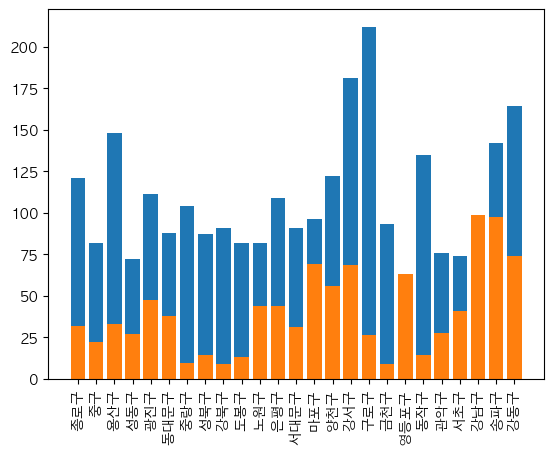

In [142]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'AppleGothic'
plt.xticks(rotation=90)
plt.bar(loc_value_route.keys(), list(loc_dict.values()))
plt.bar(loc_value_route.keys(), new_values)
plt.show()
    

# 6. 밀도와 따릉이 정류장 개수의 차이가 큰 지역구 순으로 재정렬